<a href="https://colab.research.google.com/github/renanklehm/TravellingSalesman/blob/main/Travelling_Salesman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl
import seaborn as sns
from copy import deepcopy
from IPython.display import clear_output

#Classes

##Classe que guarda a posição e índice de cada cidade

In [ ]:
class City:
    def __init__ (self, _x, _y, _idx):
        self.idx = _idx
        self.x = _x
        self.y = _y
    
    def __repr__(self):
         return f"{self.idx} - x: {self.x} - y: {self.y}"

    def __str__(self):
         return f"{self.idx} - x: {self.x} - y: {self.y}"

##Classe mestre que guarda toda a rota atual

In [ ]:
class Route:
    def __init__ (self, _cities):
        self.cities = _cities
        self.route = list()
        self.history = list()
        self.temperature_history = list()
        for city in self.cities:
            if (city.idx < len(self.cities) - 1):
                self.route.append(city)
            else:
                self.route.append(cities[0])
        self.route = np.array(self.route)
        self.total_dist = self.get_route_dist(self.route)
        self.plot_route()
        self.perfect_route = self.route
        self.perfect_dist = self.total_dist

    def get_route_dist(self, _route):
        dist = 0
        for idx in range(len(_route)):
            if (idx < _route.shape[0] - 1):
                dist += get_dist(_route[idx], _route[idx + 1])
        return dist

    def two_opt(self, temperature):
        best_route = self.route.copy()
        best_dist = self.get_route_dist(self.route)
        initial_dist = best_dist
        pass_total_delta = 0

        for i in range(1, len(self.route)-2):
            for j in range(i+1, len(self.route)):
                if (j-i == 1): 
                    continue
                new_route = self.route.copy()
                new_route[i:j] = self.route[j-1:i-1:-1]
                new_route_dist = self.get_route_dist(new_route)
                delta = best_dist - new_route_dist
                prob = np.exp((-(new_route_dist - best_dist)) / temperature)

                if ((delta > 0) or (np.random.rand() <= prob)):
                    best_route = new_route.copy()
                    best_dist = self.get_route_dist(best_route)
                    self.history.append(best_dist)
                    self.temperature_history.append(temperature)
                    pass_total_delta += delta

                    if (best_dist < self.perfect_dist):
                        self.perfect_dist = best_dist
                        self.perfect_route = best_route.copy()

        self.route = best_route.copy()
        self.total_dist = self.get_route_dist(self.route)
        return (pass_total_delta, self.total_dist)

    def restore_perfect_route(self):
        self.route = self.perfect_route
        self.total_dist = self.perfect_dist

    def plot_training(self):
        _hist = np.array(self.history)
        g = sns.relplot(x = np.arange(0, _hist.shape[0]),
                        y = _hist,
                        hue = np.array(self.temperature_history),
                        palette = "rocket",
                        kind="line",
                        aspect = 2)
        g.set(ylabel = "Distance")
        g.set(xlabel = "Iteration")
        g.ax.yaxis.set_major_formatter(mtl.ticker.FormatStrFormatter('% 1.2f'))

    def plot_route(self):
        idx = 0
        for city in self.route:
            if (idx < self.route.shape[0] - 1):
                plt.plot([city.x, self.route[idx + 1].x], [city.y, self.route[idx + 1].y], 'o-b')
                idx += 1

        plt.title(f"Total Distance: {self.total_dist:,.2f} km")
        plt.show()

#Funções

##Converte pontos (x,y) em cidades

In [ ]:
def points_to_cities (_points):
    np.random.shuffle(_points)
    cities = list()
    idx = 0
    for city in _points:
        cities.append(City(city[0], city[1], idx))
        idx += 1
    return cities

##Calcula a distância entre duas cidades

In [ ]:
def get_dist (city_1 : City, city_2 : City):
    return np.sqrt(np.power(city_2.x - city_1.x, 2) + np.power(city_2.y - city_1.y, 2))

##Solver do algoritmo Simulated Annealing

In [ ]:
def solver(_route, threshold = 1000, temperature_raise = 5, temperature_cooling = 0.95, max_temperature = 300):
    route = deepcopy(_route)
    iter = 0
    last_delta = 0
    temperature = 40
    has_hit_max = False

    while (iter < 10000):
        delta, total = route.two_opt(temperature)
        iter += 1

        if ((delta - last_delta < threshold) and (has_hit_max == False)):
            temperature += temperature_raise
            if (temperature >= max_temperature):
                has_hit_max = True
        elif (temperature <= 5):
            if ((has_hit_max) and (delta <=0)):
                break
        else:
            temperature *= temperature_cooling

        print(f"Iteration: {iter} - Total Dist: {total:,.2f} - Last Delta: {delta:,.2f} - Temperature: {temperature:,.2f}")
        clear_output(wait=True)
    
    route.restore_perfect_route()
    return route

#Aplicação

##Dataset de cidades dos EUA



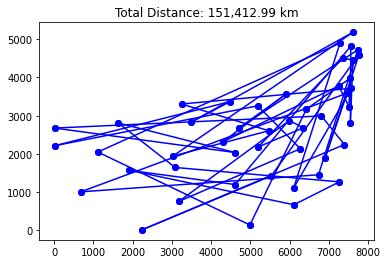

In [ ]:
us_cities = np.array([
    [6734,1453],[2233,10],[5530,1424],[401,841],[3082,1644], [7608,4458],
    [7573,3716],[7265,1268],[6898,1885],[1112,2049],[5468,2606],[5989,2873],
    [4706,2674],[4612,2035],[6347,2683],[6107,669],[7611,5184],[7462,3590],
    [7732,4723],[5900,3561],[4483,3369],[6101,1110],[5199,2182],[1633,2809],
    [4307,2322],[675,1006],[7555,4819],[7541,3981],[3177,756],[7352,4506],
    [7545,2801],[3245,3305],[6426,3173],[4608,1198],[23,2216],[7248,3779],
    [7762,4595],[7392,2244],[3484,2829],[6271,2135],[4985,140],[1916,1569],
    [7280,4899],[7509,3239],[10,2676],[6807,2993],[5185,3258],[3023,1942]
     ])
cities = points_to_cities(us_cities)
route = Route(cities)

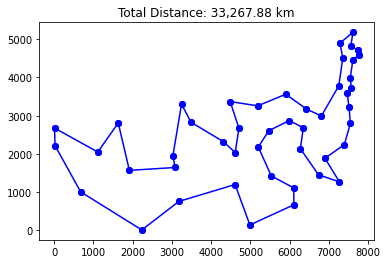

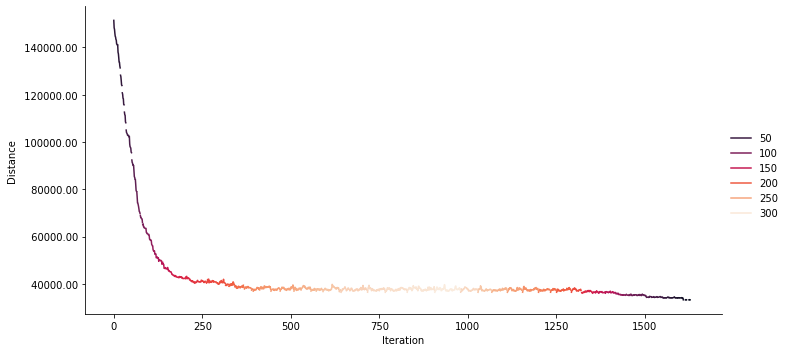

In [ ]:
route = solver(route, threshold = 10000)
route.plot_route()
route.plot_training()

##Dataset com pontos aleatórios



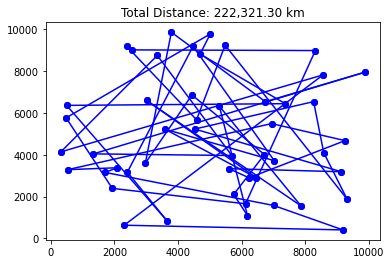

In [ ]:
cities = points_to_cities(np.random.randint(0, 10000, [50, 2]))
route = Route(cities)

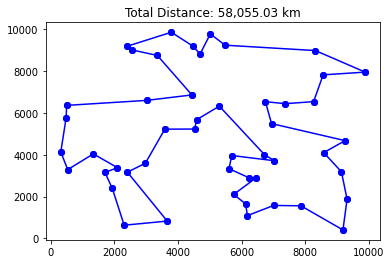

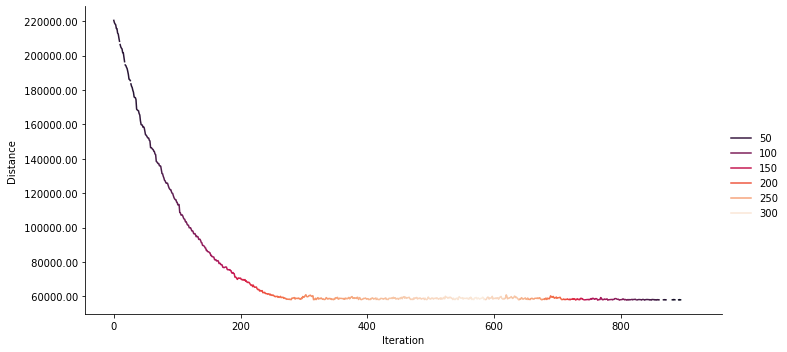

In [ ]:
route = solver(route, threshold = 10000)
route.plot_route()
route.plot_training()